In [2]:
from typing import Callable, List, Tuple, Dict, Union
import torch
from tqdm import tqdm

from data_generator import (
    merton_Q_data, merton_V_data
)
from main_phibe import phibe_finder_1D_merton
from bases import bases_poly_merton_simple, d_bases_poly_merton_simple, sec_bases_poly_merton_simple, bases_2d_merton_simple
from utils import (
    true_solution_merton, merton_policy_eval
)
from main_RL import RL_finder_1D_merton
from math import sqrt
import matplotlib.pyplot as plt
torch.set_default_dtype(torch.float64)

In [3]:
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

In [4]:
def reward(s, a):
    return s**(1 - gamma) / (1 - gamma)

In [5]:
# example 1

r = 0.02
r_b = 0.05
mu = 0.08
sig = 0.2
beta = 0.2
gamma = 0.5
info_true = {"r":r, 'r_b':r_b, "mu":mu, "sig":sig, 'gamma':gamma}

In [6]:
print((mu - r_b) / (gamma * sig**2))

1.4999999999999996


In [7]:
true_c = true_solution_merton(mu, r, r_b, sig, gamma)
true_V = merton_policy_eval(mu, r, r_b, sig, gamma, true_c, beta)
print(true_c)
print(true_V)

1.4999999999999996
12.213740458015266


In [15]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 3
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.1
dt = 1 / 12
order = 1

In [40]:
b_phibe_1, V_dist_phib_1, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, 1, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


In [100]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 3
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.1
dt = 1 / 12
order = 2

In [107]:
b_phibe_2, V_dist_phib_2, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


In [42]:
beta = beta
b_init = 0.5
bd_low_s = 0.01
bd_upper_s = 3
bd_low_a = 0.
bd_upper_a = 2
reward = reward
bases_Q = bases_2d_merton_simple
num_iter = 10
I = 6
m_Q = 2 * int(1e7 / I)
dt = 1 / 12
true_V = true_V

In [60]:
b_RL, dist_RL = RL_finder_1D_merton(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


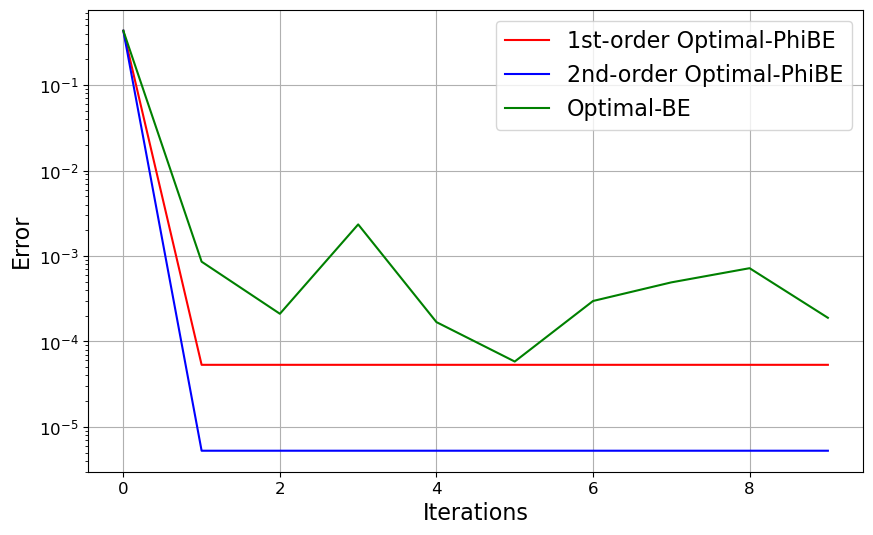

In [109]:
x_tensor = torch.arange(10)
w_tensor = torch.tensor(V_dist_phib_1[:10], dtype=torch.float64)
y_tensor = torch.tensor(V_dist_phib_2[:10], dtype=torch.float64)
v_tensor = torch.tensor(dist_RL[:10], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("merton/1.eps", format='eps')
plt.show()

In [110]:
# example 2

r = 0.02
r_b = 0.05
mu = 0.06
sig = 0.3
beta = 0.15
gamma = 0.5
info_true = {"r":r, 'r_b':r_b, "mu":mu, "sig":sig, 'gamma':gamma}

In [111]:
true_c = true_solution_merton(mu, r, r_b, sig, gamma)
true_V = merton_policy_eval(mu, r, r_b, sig, gamma, true_c, beta)
print(true_c)
print(true_V)

0.8888888888888888
15.254237288135592


In [139]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 2.
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.1
dt = 1 / 12
order = 1

In [142]:
b_phibe_1, V_dist_phib_1, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


In [159]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 2.
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
lr = 0.1
dt = 1 / 12
order = 2

In [212]:
b_phibe_2, V_dist_phib_2, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


In [215]:
beta = beta
b_init = 0.5
bd_low_s = 0.01
bd_upper_s = 3
bd_low_a = 0.
bd_upper_a = 2
reward = reward
bases_Q = bases_2d_merton_simple
num_iter = 10
I = 6
m_Q = 2 * int(1e7 / I)
dt = 1 / 12
true_V = true_V

In [216]:
b_RL, dist_RL = RL_finder_1D_merton(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


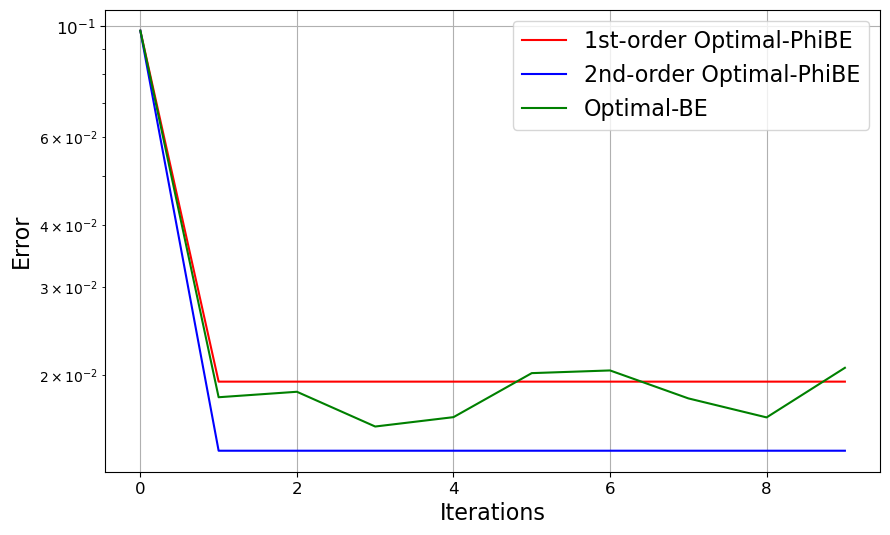

In [218]:
x_tensor = torch.arange(10)
w_tensor = torch.tensor(V_dist_phib_1[:10], dtype=torch.float64)
y_tensor = torch.tensor(V_dist_phib_2[:10], dtype=torch.float64)
v_tensor = torch.tensor(dist_RL[:10], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("merton/2.eps", format='eps')
plt.show()

In [219]:
# example 3

r = 0.02
r_b = 0.05
mu = 0.07
sig = 0.3
beta = 0.2
gamma = 0.5
info_true = {"r":r, 'r_b':r_b, "mu":mu, "sig":sig, 'gamma':gamma}

In [220]:
true_c = true_solution_merton(mu, r, r_b, sig, gamma)
true_V = merton_policy_eval(mu, r, r_b, sig, gamma, true_c, beta)
print(true_c)
print(true_V)

1
11.347517730496453


In [226]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 3.
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
order = 1
lr = 0.1
dt = 1 / 12

In [239]:
b_phibe_1, V_dist_phib_1, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 1 using Galerkin: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


In [240]:
V_dist_phib_1

[0.12783165554285425,
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172),
 tensor(0.0172)]

In [251]:
b_init = 0.5
Q_init = 0.5 * torch.tensor([1., 1., 1.]).to(device)
batch_size = int(1e7)
bd_low_s = 0.01
bd_upper_s = 3.
bd_low_b = 0.
bd_upper_b = 2.
bases_V = bases_poly_merton_simple
d_bases_V = d_bases_poly_merton_simple
sec_d_bases_V = sec_bases_poly_merton_simple
bases_Q = bases_2d_merton_simple
num_iter = 10
GD_num_iter = 100
I = 6
m = int(batch_size / I)
m_Q = int(batch_size / I)
order = 2
lr = 0.1
dt = 1 / 12

In [254]:
b_phibe_2, V_dist_phib_2, V = phibe_finder_1D_merton(beta, b_init, Q_init, bd_low_s, bd_upper_s, bd_low_b, bd_upper_b, reward, bases_V, d_bases_V, sec_d_bases_V, bases_Q, num_iter, False, "Galerkin", GD_num_iter, m, m_Q, I, lr, dt, order, true_V, info_true)

Running Optimal Phibe of order 2 using Galerkin: 100%|██████████| 10/10 [00:02<00:00,  3.33it/s]


In [255]:
V_dist_phib_2

[0.12783165554285425,
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143),
 tensor(0.0143)]

In [256]:
beta = beta
b_init = 0.5
bd_low_s = 0.01
bd_upper_s = 3
bd_low_a = 0.
bd_upper_a = 2
reward = reward
bases_Q = bases_2d_merton_simple
num_iter = 10
I = 6
m_Q = int(1e7 / I)
dt = 1 / 12
true_V = true_V

In [261]:
b_RL, dist_RL = RL_finder_1D_merton(beta, b_init, bd_low_s, bd_upper_s, bd_low_a, bd_upper_a, reward, bases_Q, num_iter, m_Q, I, dt, true_V, info_true)

Running Optimal BE PI: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


In [262]:
dist_RL

[0.12783165554285425,
 tensor(0.0188),
 tensor(0.0234),
 tensor(0.0147),
 tensor(0.0204),
 tensor(0.0171),
 tensor(0.0137),
 tensor(0.0183),
 tensor(0.0207),
 tensor(0.0167)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


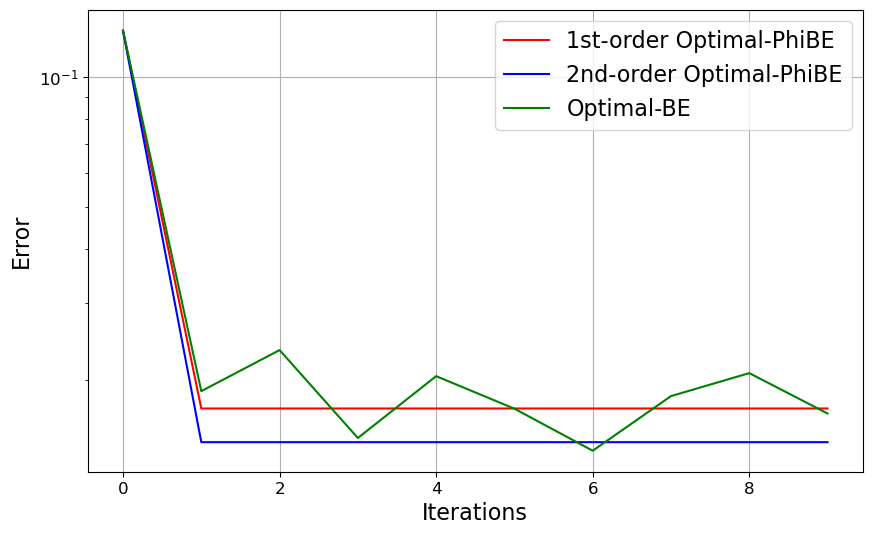

In [263]:
x_tensor = torch.arange(10)
w_tensor = torch.tensor(V_dist_phib_1[:10], dtype=torch.float64)
y_tensor = torch.tensor(V_dist_phib_2[:10], dtype=torch.float64)
v_tensor = torch.tensor(dist_RL[:10], dtype=torch.float64)
x_values = x_tensor.numpy()
w_values = w_tensor.numpy()
y_values = y_tensor.numpy()
v_values = v_tensor.numpy()
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.semilogy(x_values, w_values, label='1st-order Optimal-PhiBE', color='red')
plt.semilogy(x_values, y_values, label='2nd-order Optimal-PhiBE', color='blue')
plt.semilogy(x_values, v_values, label='Optimal-BE', color='green')
# plt.title('Error during the iteration (measured by policy)', fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.savefig("merton/3.eps", format='eps')
plt.show()